In [168]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import (accuracy_score, 
                            confusion_matrix, 
                            classification_report,
                            plot_confusion_matrix)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt 

# importing scaler 
from sklearn.preprocessing import StandardScaler

# import vectorizers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text 

import time 

# put note here about how I pickled in other notebooks but left the read_csv here because didn't use column and grid searches take too long

# also how I drop stemmed and combo column for dataframe but not for this notebook 


In [117]:
pwd

'/Users/emilynaftalin/Data_Science/General Assembly/dsi/projects/project_3/code'

In [118]:
country_rock = pd.read_csv('../datasets/country_rock.csv')
country_rock.head()

,label,merged,tokens,stemmed,combo
0,0,country suggestions ve been starting to get in...,"['country', 'suggestions', 've', 'been', 'star...","['countri', 'suggest', 've', 'been', 'start', ...",countri suggest ve been start to get into coun...
1,0,hank williams sr m so lonesome could cry (1949),"['hank', 'williams', 'sr', 'm', 'so', 'lonesom...","['hank', 'william', 'sr', 'm', 'so', 'lonesom'...",hank william sr m so lonesom could cri 1949
2,0,cody jinks loud and heavy,"['cody', 'jinks', 'loud', 'and', 'heavy']","['codi', 'jink', 'loud', 'and', 'heavi']",codi jink loud and heavi
3,0,"southern raised performs ""what day that will b...","['southern', 'raised', 'performs', 'what', 'da...","['southern', 'rais', 'perform', 'what', 'day',...",southern rais perform what day that will be at...
4,0,is anybody still making texas swing? my father...,"['is', 'anybody', 'still', 'making', 'texas', ...","['is', 'anybodi', 'still', 'make', 'texa', 'sw...",is anybodi still make texa swing my father in ...


In [ ]:
# country_rock = pd.read_pickle('../datasets/country_rock.pkl')
# country_rock.head()

In [119]:
# checking for null valuees in combo column
country_rock['combo'].isnull().sum()

0

In [120]:
# identifying X and y 
X = country_rock['combo']
y = country_rock['label']
    
# splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                               y, 
                                               test_size=0.25,
                                               shuffle=True,
                                               stratify=y,
                                               random_state=42)

# checking class balance 
print(f'Value counts: \n{y.value_counts(normalize=True)}')

Value counts: 
0    0.500502
1    0.499498
Name: label, dtype: float64


# Grid Searches for Model Benchmarking 

### _Explanation of System_

#### For all of my grid search models, the following workflow is used to find and evaluate the best model for the chosen vectorizer and estimator pairing.

#### The process is wrapped in the functions below. 

+ Building pipelines according to the following syntax: 

```python
pipe = Pipeline([
        (vec_nickname, vectorizer),
        (est_nickname, estimator)
    ])
```

+ Building Gridsearch parameter dictionaries according the following syntax: 

```python 
param_dict  = {
    'vec_nickname__hyperparameter':[hyperparameter options],
    'est_nickname__hyperparameter':[hyperparameter options]
}
```

+ Building Gridsearch using the following syntax:

```python
grid = GridSearchCV(pipe, 
                   param_dict,
                   cv = 5,
                   verbose = 2,
                   n_jobs=8)

grid.fit(X_train, y_train)
```

+ Building a confusion matrix (where relevant) as follows: 

```python
y_preds = grid.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()

plot_confusion_matrix(grid, X_test, y_test, cmap="Blues")  
```

In [121]:
def build_pipe(vec_nickname, vectorizer, est_nickname, estimator):
    pipe = Pipeline([
        (vec_nickname, vectorizer),
        (est_nickname, estimator)
    ])
    return pipe

In [122]:
def grid_search(X_train, y_train, X_test, y_test, est_name, pipe, param_dict):
    
    grid = GridSearchCV(pipe, 
                       param_dict,
                       cv = 5,
                       verbose = 2,
                       n_jobs=8)
    
    grid.fit(X_train, y_train)
    
    print(f'Score for gridsearched {est_name} Pipeline: {grid.best_score_}\n')
    print(f'Best parameters from {est_name} pipeline gridsearch:  {grid.best_params_}\n')
    
    y_preds = grid.predict(X_test)
    
    #confusion matrix
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()
    plot_confusion_matrix(grid, X_test, y_test, cmap="Blues")      

In [123]:
def model_metrics(model, est_name):
    print(f'Score for gridsearched {est_name} Pipeline: {model.best_score_}\n')
    print(f'Best parameters from {est_name} pipeline gridsearch:  {model.best_params_}\n')
    
    y_preds = model.predict(X_test)
    
    #confusion matrix
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()
    plot_confusion_matrix(model, X_test, y_test, cmap="Blues")  

## `Logistic Regression`

#### `Countvectorizer + Logistic Regression`

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.70775885 0.81320089 0.81542682 0.83816781 0.82389802 0.83058599
 0.71221667 0.82256271 0.81921451 0.84217722 0.83013956 0.84039448
 0.70753613 0.80517389 0.80985517 0.81186161 0.79915482 0.80205039
 0.7126621  0.82055478 0.81453422 0.83638309 0.81542782 0.83192403
 0.70753613 0.80428228 0.80762601 0.81141692 0.79291625 0.79447478
 0.71221667 0.81899427 0.81609522 0.83036352 0.81163914 0.82345184
        nan        nan        nan

Score for gridsearched Logistic Regression Pipeline: 0.8499797642723952

Best parameters from Logistic Regression pipeline gridsearch:  {'cvec__max_features': 5000, 'cvec__min_df': 1, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english', 'logreg__C': 1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}



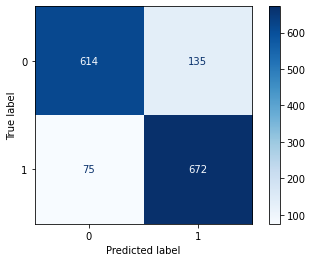

In [124]:
logreg_cvec_pipe = build_pipe('cvec', CountVectorizer(), 'logreg', LogisticRegression())

logreg_cvec_pipe_params = {
    'cvec__max_features':[3000, 4000, 5000],
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1,1),(1,2),(1,3)],
    'cvec__min_df': [0.75, 1],
    'logreg__C': [0.1, 1, 10],
    'logreg__penalty' : ['l1', 'l2'],
    'logreg__solver': ['liblinear']
}

logreg_cvec_grd_fxn = grid_search(X_train, y_train, X_test, y_test, 'Logistic Regression', logreg_cvec_pipe, logreg_cvec_pipe_params)

# print(logreg_cvec_grd_fxn.best_params_)

_Below, I am making sure that my function is working by running through the steps outside the function with a Logistic Regression._

In [125]:
logreg_cvec_pipe = Pipeline([
        ('cvec', CountVectorizer()),
        ('logreg', LogisticRegression())
    ])

logreg_cvec_pipe_params = {
    'cvec__max_features':[3000, 4000, 5000],
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1,1),(1,2),(1,3)],
    'cvec__min_df': [0.75, 1],
    'logreg__C': [0.1, 1, 10],
    'logreg__penalty' : ['l1', 'l2'],
    'logreg__solver': ['liblinear']
}

logreg_cvec_grid = GridSearchCV(logreg_cvec_pipe, 
                   logreg_cvec_pipe_params,
                   cv = 5,
                   verbose = 2,
                   n_jobs=8)

logreg_cvec_grid.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.70753613 0.81320089 0.81587251 0.83816781 0.82412074 0.83058599
 0.7126621  0.82256271 0.81921426 0.84217722 0.82991635 0.84039448
 0.70775885 0.80517389 0.81007814 0.81186161 0.79893185 0.80205039
 0.71221667 0.82055478 0.81475718 0.83638309 0.81565029 0.83192403
 0.70775885 0.80428228 0.80762626 0.81141692 0.79247007 0.79447478
 0.71221667 0.81899427 0.81587226 0.83036352 0.81297694 0.82345184
        nan        nan        nan

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('logreg', LogisticRegression())]),
             n_jobs=8,
             param_grid={'cvec__max_features': [3000, 4000, 5000],
                         'cvec__min_df': [0.75, 1],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'cvec__stop_words': [None, 'english'],
                         'logreg__C': [0.1, 1, 10],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear']},
             verbose=2)

In [126]:
logreg_cvec_grid.best_params_

{'cvec__max_features': 5000,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'logreg__C': 1,
 'logreg__penalty': 'l2',
 'logreg__solver': 'liblinear'}

Score for gridsearched Logistic Regression Pipeline: 0.8499797642723952

Best parameters from Logistic Regression pipeline gridsearch:  {'cvec__max_features': 5000, 'cvec__min_df': 1, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english', 'logreg__C': 1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}



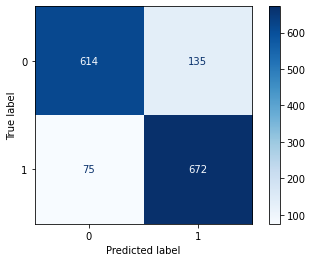

In [127]:
model_metrics(logreg_cvec_grid, 'Logistic Regression')

_Looks like the function is working, but since the function outputs a confusing nonetype object, I will not use and will instead do grid searches manually, outside a functio. I will keep the functions in the notebook in case I need to use any of them. I will be using the `model_metrics` function to get the best parameters, best score, and confusion matrix for each model._ 

#### `Tfidf + Logistic Regression`

In [128]:
logreg_tfidf_pipe = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('logreg', LogisticRegression())
    ])

logreg_tfidf_pipe_params = {
    'tfidf__max_features':[3000, 4000, 5000],
    'tfidf__stop_words': [None, 'english'],
    'tfidf__ngram_range': [(1,1),(1,2),(1,3)],
    'tfidf__min_df': [0.75, 1],
    'logreg__C': [0.1, 1, 10],
    'logreg__penalty' : ['l1', 'l2'],
    'logreg__solver': ['liblinear', 'newton-cg', 'lbfgs']
}

logreg_tfidf_grid = GridSearchCV(logreg_tfidf_pipe, 
                   logreg_tfidf_pipe_params,
                   cv = 5,
                   verbose = 2,
                   n_jobs=8)

logreg_tfidf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
 0.60833538 0.6114569  0.60722055 0.60900428 0.60788945 0.60900428
        nan        nan        nan        nan        nan        nan
 0.60722055 0.60900428 0.60699759 0.60722055 0.60699759 0.60722055
        nan        nan        nan        nan        nan        nan
 0.60722055 0.60900428 0.60699759 0.60722055 0.60722055 0.60722055
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('logreg', LogisticRegression())]),
             n_jobs=8,
             param_grid={'logreg__C': [0.1, 1, 10],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear', 'newton-cg', 'lbfgs'],
                         'tfidf__max_features': [3000, 4000, 5000],
                         'tfidf__min_df': [0.75, 1],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'tfidf__stop_words': [None, 'english']},
             verbose=2)

In [131]:
logreg_tfidf_grid.score(X_train, y_train)

0.9839500668747213

In [132]:
logreg_tfidf_grid.score(X_test, y_test)

0.8663101604278075

In [ ]:
logreg_cvec_grid

In [133]:
logreg_tfidf_grid.best_params_

{'logreg__C': 10,
 'logreg__penalty': 'l2',
 'logreg__solver': 'newton-cg',
 'tfidf__max_features': 4000,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (1, 1),
 'tfidf__stop_words': 'english'}

Score for gridsearched Logistic Regression w/ TfIdf Pipeline: 0.8568887134298192

Best parameters from Logistic Regression w/ TfIdf pipeline gridsearch:  {'logreg__C': 10, 'logreg__penalty': 'l2', 'logreg__solver': 'newton-cg', 'tfidf__max_features': 4000, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1), 'tfidf__stop_words': 'english'}



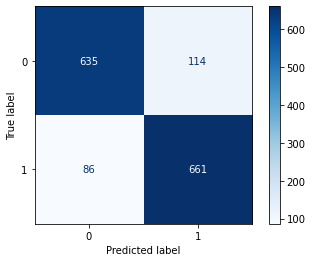

In [129]:
model_metrics(logreg_tfidf_grid, "Logistic Regression w/ TfIdf")

```

pipe = Pipeline([
        (vec_nickname, vectorizer),
        (est_nickname, estimator)
    ])
```

+ Building Gridsearch parameter dictionaries according the following syntax: 

```python 
param_dict  = {
    'vec_nickname__hyperparameter':[hyperparameter options],
    'est_nickname__hyperparameter':[hyperparameter options]
}
```

+ Building Gridsearch using the following syntax:

```python
grid = GridSearchCV(pipe, 
                   param_dict,
                   cv = 5,
                   verbose = 2,
                   n_jobs=8)
```

+ Fitting the grid search on the training data.

```
grid.fit(X_train, y_train)
```

## `Naïve Bayes` 

#### `Naïve Bayes + CountVectorizer`

In [144]:
nb_cvec_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

nb_cvec_params = {
    'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__ngram_range': [(1,1),(1,2),(1,3)],
    'cvec__min_df': [0.75, 1],
    'nb__alpha': [0.001, 0.1, 1.0, 10]
}

nb_cvec_grid = GridSearchCV(nb_cvec_pipe,
                            nb_cvec_params,
                            cv=5,
                            verbose=2,
                            n_jobs=8)

In [145]:
nb_cvec_grid.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.82033033 0.82344961 0.82189183 0.79113129 0.7875626  0.78800803
 0.78199169 0.77485729 0.77998277 0.78087413 0.77418716 0.76371002
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.82701581 0.83659985 0.83214402 0.79024067 0.80628772 0.80695588
 0.80584155 0.79202241 0.8024998  0.80205436 0.79514417 0.78176749
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.83147463 0.84083595 0.83704827 0.78845769 0.81943822 0.82055255
 0.81788019 0.79893309 0.81141518 0.81409102 0.80829615 0.79558911
        nan        nan        nan

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=8,
             param_grid={'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [0.75, 1],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'nb__alpha': [0.001, 0.1, 1.0, 10]},
             verbose=2)

Score for gridsearched Multinomial Naive Bayes w/ CountVectorizer Pipeline: 0.8428436287252982

Best parameters from Multinomial Naive Bayes w/ CountVectorizer pipeline gridsearch:  {'cvec__max_features': 5000, 'cvec__min_df': 1, 'cvec__ngram_range': (1, 1), 'nb__alpha': 1.0}



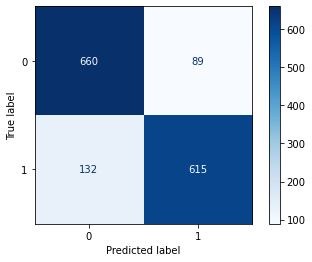

In [146]:
model_metrics(nb_cvec_grid, 'Multinomial Naive Bayes w/ CountVectorizer')

In [147]:
nb_cvec_grid.score(X_train, y_train)

0.9335711101203745

In [148]:
nb_cvec_grid.score(X_test, y_test)

0.8522727272727273

#### `Naïve Bayes + TfIdf` 

_Below I will build pipeline including Multinomial Naive Bayes. Though MNB asks us to have positive integers and Tf-idf does not yield positive integers, fractional counts (such as Tf-Idf) actually to work with multinomial distributions in practice._

_Citation: DSI 5.04-lesson-nlp-ii_

In [137]:
nb_tfidf_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

nb_tfidf_params = {
    'tfidf__max_features': [2000, 3000, 4000, 5000],
    'tfidf__ngram_range': [(1,1),(1,2),(1,3)],
    'tfidf__min_df': [0.75, 1]
}

nb_tfidf_grid = GridSearchCV(nb_tfidf_pipe,
                            nb_tfidf_params,
                            cv=5,
                            verbose=2,
                            n_jobs=8)

In [138]:
nb_tfidf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.82144391 0.78733939 0.78354947
        nan        nan        nan 0.83370527 0.80784724 0.79893185
        nan        nan        nan 0.83972509 0.82166762 0.81319792
        nan        nan        nan 0.83638309 0.8283546  0.82189158]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=8,
             param_grid={'tfidf__max_features': [2000, 3000, 4000, 5000],
                         'tfidf__min_df': [0.75, 1],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             verbose=2)

Score for gridsearched Multinomial Naive Bayes w/ TfIdf Pipeline: 0.8397250920539389

Best parameters from Multinomial Naive Bayes w/ TfIdf pipeline gridsearch:  {'tfidf__max_features': 4000, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)}



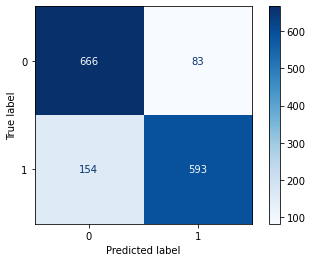

In [140]:
model_metrics(nb_tfidf_grid, 'Multinomial Naive Bayes w/ TfIdf')

In [141]:
nb_tfidf_grid.score(X_train, y_train)

0.9324565314311191

In [142]:
nb_tfidf_grid.score(X_test, y_test)

0.8415775401069518

## `k-Nearest Neighbors` 

#### `KNN + CountVectorizer`

In [150]:
knn_cvec_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('knn', KNeighborsClassifier())
])

knn_cvec_params = {
    'cvec__max_features': [3000, 4000, 5000, 6000],
    'cvec__ngram_range': [(1,1),(1,2),(1,3)],
    'cvec__min_df': [0.75, 1],
    'knn__leaf_size': range(1, 50, 5),
    'knn__n_neighbors': range(1, 50, 5),
    'knn__metric': ['euclidean', 'manhattan'],
    'knn__weights': ['uniform', 'distance']
}

knn_cvec_grid = GridSearchCV(knn_cvec_pipe,
                            knn_cvec_params,
                            cv=5,
                            verbose=2,
                            n_jobs=8)

In [151]:
knn_cvec_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9600 candidates, totalling 48000 fits


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.59852863 0.53499688 0.59496168]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=8,
             param_grid={'cvec__max_features': [3000, 4000, 5000, 6000],
                         'cvec__min_df': [0.75, 1],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'knn__leaf_size': range(1, 50, 5),
                         'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': range(1, 50, 5),
                         'knn__weights': ['uniform', 'distance']},
             verbose=2)

In [152]:
knn_cvec_grid.score(X_train, y_train)

0.9977708426214891

In [153]:
knn_cvec_grid.score(X_test, y_test)

0.6864973262032086

Score for gridsearched KNN w/ Count Vectorization Pipeline: 0.7333911851680807

Best parameters from KNN w/ Count Vectorization pipeline gridsearch:  {'cvec__max_features': 6000, 'cvec__min_df': 1, 'cvec__ngram_range': (1, 1), 'knn__leaf_size': 1, 'knn__metric': 'manhattan', 'knn__n_neighbors': 36, 'knn__weights': 'distance'}



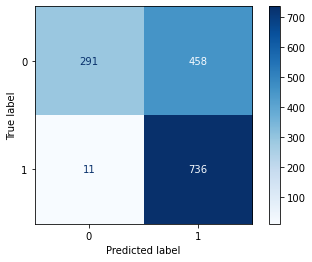

In [155]:
model_metrics(knn_cvec_grid, 'KNN w/ Count Vectorization')

## `Random Forest & Extra Trees`

#### `Extra Trees Classifier + Count Vectorizer`

_Use of `CountVectorizer` as my vectorizer was informed by a set of pipeline I ran in my practice code notebooks that compared different ensemble classier models paired `CountVectorizer` and `Tfidf Vectorizer`. Extra Trees w/ CountVec performed better (higher accuracy, less variance) than other pairings. Hyperparameters are also informed by the best parameters found in those ensemble model grid searches in a practice code notebook._ 

In [159]:
et_cvec_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('et', ExtraTreesClassifier())
])

et_cvec_params = {
    'cvec__max_features':[2000, 3000, 4000],
    'cvec__ngram_range': [(1,1),(1,2),(1,3)],
    'et__ccp_alpha': [0.001, 0.05, 0.1, 1],
    'et__max_depth': [6,8,10],
    'et__min_samples_leaf': [4,6,8],
    'et__min_samples_split': [5,10]
}

et_cvec_grid = GridSearchCV(et_cvec_pipe,
                           et_cvec_params,
                           cv=5,
                           verbose=2,
                           n_jobs=8)

In [160]:
# this time going to try it!
import time 
t0 = time.time()

et_cvec_grid.fit(X_train, y_train)

print(f'This cell took {time.time() - t0} seconds to run')

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
This cell took 550.3536219596863 seconds to run


In [161]:
et_cvec_grid.best_score_

0.7521143231707772

#### `Random Forest Classifier + Tf-Idf Vectorizer`

In [175]:
rf_tfidf_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

rf_tfidf_params = {
    'tfidf__max_features': [2000, 3000, 4000],
    'tfidf__ngram_range': [(1,1), (1,2), (1,3)],
    'rf__ccp_alpha': [0.001, 0.1],
    'rf__max_depth': [6, 8, 10],
    'rf__min_samples_leaf': [6, 8],
    'rf__min_samples_split': [3, 5, 8], 
    'rf__n_estimators': [50, 150, 250],
    'rf__criterion': ['gini', 'entropy'],
    'rf__max_features': ['auto', 'sqrt'],
    'rf__warm_start': [True, False]
}

rf_tfidf_grid = GridSearchCV(rf_tfidf_pipe,
                            rf_tfidf_params,
                            cv=5, 
                            verbose=2,
                            n_jobs=8)

In [176]:
rf_tfidf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 7776 candidates, totalling 38880 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=8,
             param_grid={'rf__ccp_alpha': [0.001, 0.1],
                         'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [6, 8, 10],
                         'rf__max_features': ['auto', 'sqrt'],
                         'rf__min_samples_leaf': [6, 8],
                         'rf__min_samples_split': [3, 5, 8],
                         'rf__n_estimators': [50, 150, 250],
                         'rf__warm_start': [True, False],
                         'tfidf__max_features': [2000, 3000, 4000],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             verbose=2)

In [178]:
rf_tfidf_grid.score(X_train, y_train)

0.7935800267498886

In [179]:
rf_tfidf_grid.score(X_test, y_test) 

0.7647058823529411

## `Support Vector Machines`

#### `SVC + Count Vectorizer`

In [163]:
svc_cvec_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('svc', SVC())
])

svc_cvec_params = {
    'cvec__max_features':[2000, 3000, 4000, 5000],
    'cvec__ngram_range': [(1,1),(1,2),(1,3)],
#     'svc__gamma': ['scale', 'auto'],
    'svc__tol': [0.001, 0.01],
    'svc__C': np.linspace(0, 5, 20),
    'svc__kernel':['linear', 'rbf', 'polynomial', 'sigmoid'],
    'svc__degree':[1, 2, 3, 4]
}

svc_cvec_grid = GridSearchCV(svc_cvec_pipe,
                             svc_cvec_params,
                             cv=5,
                             verbose=2,
                             n_jobs=8)

In [164]:
t0 = time.time()

svc_cvec_grid.fit(X_train, y_train)

print(f'This cell took {time.time() - t0} seconds to run')

Fitting 5 folds for each of 7680 candidates, totalling 38400 fits


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ...        nan 0.59072161 0.59049864]
  warnings.warn(


This cell took 18366.504160642624 seconds to run


In [166]:
svc_cvec_grid.score(X_train, y_train)

0.9777084262148907

In [167]:
svc_cvec_grid.score(X_test, y_test)

0.8495989304812834

_Note: While I thought that I had included stop_word removal in my pre-processing, I realized only after doing the above grid searches that I failed to do. I will now start adding stop_word removal to my model benchmarking and will use it in my final models. Excluding my custom `stop_words` (from the list in the cell below) will reduce the accuracy of my model because it prevents a model from using "country" and "rock" which are of course two of most helpful words in determing the class of the subreddit._

_Citation: Thank you Heather Johansen for helping figure out how to include my own custom list of words alongside the English stop words._

In [177]:
country_rock_stop_words = ['country', 'countries', 'rock', 'roll', 'just','song', 'songs', 'music', 
                           'album', 'band', 'bands', 'artist', 'artists', 've', 'don']
all_stop_words = text.ENGLISH_STOP_WORDS.union(country_rock_stop_words)